# LOANS AWARDED BY KIVA
## DATA VISUALISATION PROJECT

### INTRODUCTION

<a href = 'https://www.kiva.org/about'>Kiva</a> is an online crowdfunding loans platform, providing help to financially excluded people for various causes, from student tuition to emergency healthcare. According to Kiva: ‘more than 1.7B people around the world are unbanked and can’t access the financial services they need”. So far, Kiva has connected more than 3.9M borrowers with 1.9M lenders in 77 countries, providing a total of $1.56B of loans to people in financial need.

### SCOPE

#### <u> GOALS </u>

1. Explore the distribution of loan amounts by country, project, and gender using various visualisation tools.
2. Identify any biases in the loans distributed, based on the attributes of the lenders.

#### <u> ACTIONS </u>

- Based on the results of the analysis, is there anything about the general trends and patterns of Kiva’s loan distribution that indicates the presense of biases based on either gender, country, or project activity?
- If biases do exist, what can Kiva do to address those biases?

#### <u> DATA </u>

- The data was provided by Kiva as part of Kaggle's <a href = 'https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding'>“Data Science For Good: Kiva Crowdfunding”</a> challenge project in 2018.
- The data goes back two years from the date of publishing, to 2016.
- There are 5 columns in the dataset, containing information on loan amount, type of activity the loan financed, country where the project is based, and gender of the person applying for the loan.
- There are 65,499 samples in total.

#### <u> ANALYSIS </u>

1. Bar charts of average loan amount by country, hue gender
2. Box plot of loan amount by country
3. Box plot of loan amount by project activity
4. Violin plot of loan amount by project activity
5. Violin plot of loan amount by country, hue gender

### CONCLUSIONS

- Males receive significantly greater loan amounts than females do in each country despite there being significantly more female loan applications.<br><br>

- One is much more likely to receive a high loan amount in El Salvador regardless of gender than in any other country. However, if one is male, one is more likely to receive the largest possible loan amount in Cambodia, where the median loan amount is highest.<br><br>

- Kenya and Pakistan are the only countries that apply for Farming loans from this dataset, and applicants can expect to receives generous loan amounts, with the average being 459.98USD and 427.31USD respectively.<br><br>

- For other activities, General Store is the least likely to receive a high loan amount, especially in Philippines, where the average loan amount for this activity is 334USD.<br><br>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('kiva_data.csv')
print(df.head(), '\n\n')
groupby_1 = df.groupby(['activity', 'country']).loan_amount.mean().reset_index()
groupby_2 = df.groupby(['activity', 'country', 'gender']).loan_amount.count().reset_index()
groupby_3 = df.groupby(['country', 'gender']).loan_amount.mean().reset_index()
print(groupby_1, '\n\n')
print(groupby_2, '\n\n')
print(groupby_3, '\n\n')
print(len(df))

   loan_amount               activity   country  gender
0          625  Food Production/Sales  Pakistan  female
1          250  Food Production/Sales  Pakistan  female
2          400  Food Production/Sales  Pakistan  female
3          400  Food Production/Sales  Pakistan  female
4          500  Food Production/Sales  Pakistan  female 


                 activity      country  loan_amount
0                 Farming        Kenya   459.977238
1                 Farming     Pakistan   427.314815
2   Food Production/Sales     Cambodia   643.666667
3   Food Production/Sales  El Salvador   545.686667
4   Food Production/Sales        Kenya   340.672589
5   Food Production/Sales     Pakistan   438.793103
6   Food Production/Sales  Philippines   297.283054
7           General Store     Cambodia   646.236559
8           General Store  El Salvador   612.056152
9           General Store        Kenya   353.107998
10          General Store     Pakistan   434.710874
11          General Store  Philippine

       country  loan_amount
0     Cambodia   645.089286
1  El Salvador   571.731205
2        Kenya   391.404930
3     Pakistan   434.462486
4  Philippines   328.092614


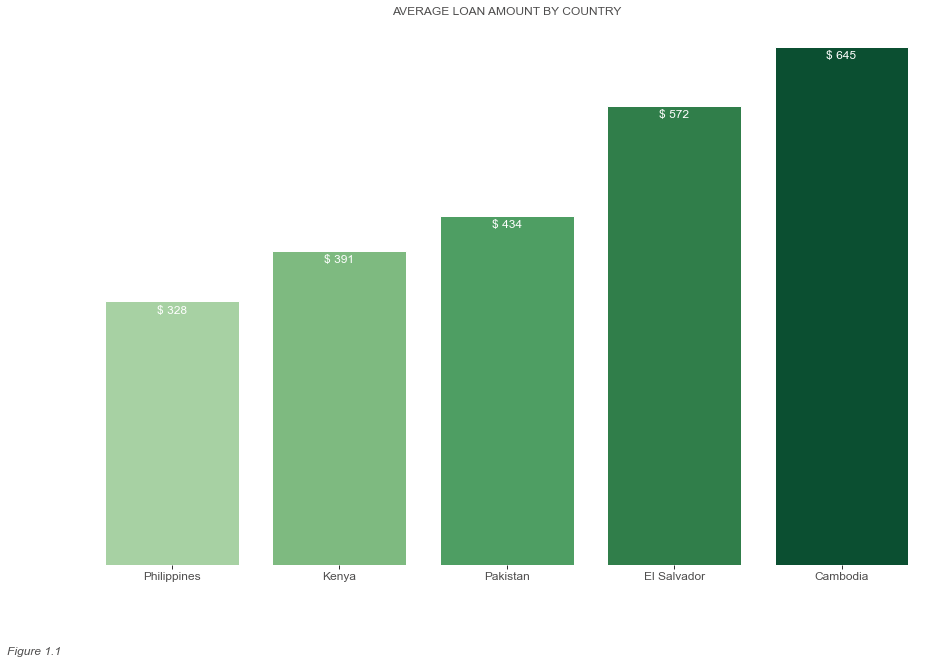

In [4]:
#import matplotlib.ticker as mtick

groupby_country = df.groupby(['country']).loan_amount.mean().reset_index()
print(groupby_country)

#sns.set_context('paper', font_scale = 1.2)

def loan_amount_by_country_barplot():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    sns.barplot(x = 'country', y = 'loan_amount', data = df,\
                #palette = ['#d9f0a3', '#addd8e', '#78c679', '#41ab5d', '#238443'],\
                palette = ['#a1d99b', '#74c476', '#41ab5d', '#238b45', '#005a32'],\
                order = ['Philippines', 'Kenya', 'Pakistan', 'El Salvador', 'Cambodia'],\
                ci = None)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('AVERAGE LOAN AMOUNT BY COUNTRY', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 12, color = '#4f4e4e')
    #tick = mtick.StrMethodFormatter('${x:,.0f}')
    #ax.yaxis.set_major_formatter(tick)
    plt.yticks([], [])

    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 15
        ax.text(x, y, s = '$ {:.0f}'.format(p.get_height()), ha = 'center', color = 'white',\
                fontsize = 12)
    
    plt.figtext(0.05, 0.0, 'Figure 1.1', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_country_barplot()

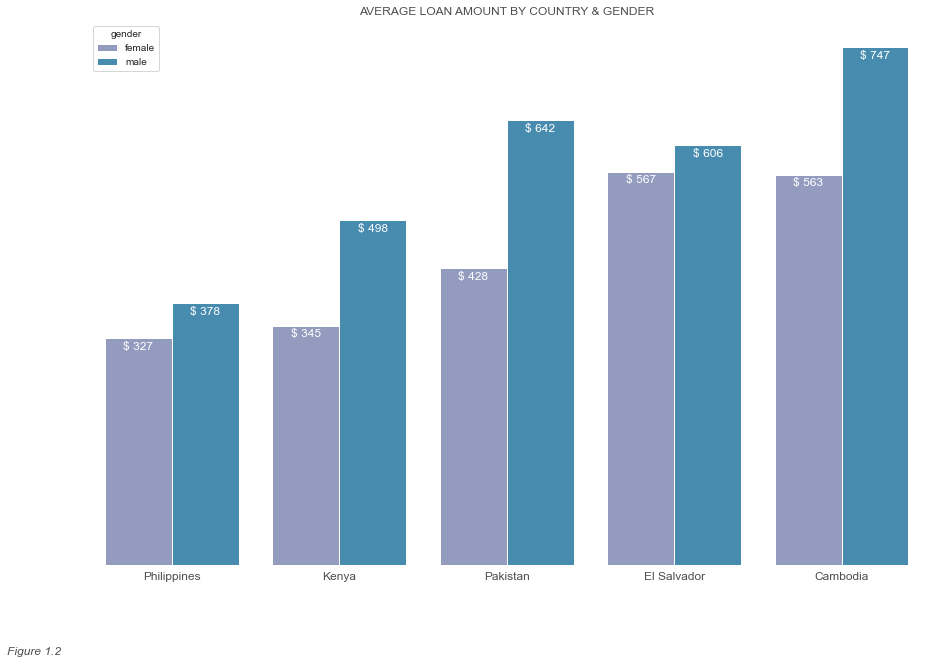

In [5]:
def loan_amount_by_country_hue_gender_barplot():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    sns.barplot(x = 'country', y = 'loan_amount', hue = 'gender', data = df,\
                palette = ['#8c96c6', '#3690c0'],\
                order = ['Philippines', 'Kenya', 'Pakistan', 'El Salvador', 'Cambodia'],\
                ci = None)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('AVERAGE LOAN AMOUNT BY COUNTRY & GENDER', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 12, color = '#4f4e4e')
    plt.yticks([], [])

    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x() + p.get_width()/2, y = height  - 17,\
                s = '$ {:.0f}'.format(height), ha = 'center', color = 'white', fontsize = 12)
    
    plt.figtext(0.05, 0.0, 'Figure 1.2', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_country_hue_gender_barplot()

- On average, males receive larger loans from Kiva than females.
- El Salvador has the least disparity between loan amounts given to males and females.
- However, significantly more females receive loans than males overall in all countries:

In [49]:
groupby = df.groupby(['country', 'gender']).loan_amount.count().reset_index()
print(groupby)

       country  gender  loan_amount
0     Cambodia  female           93
1     Cambodia    male           75
2  El Salvador  female         5480
3  El Salvador    male          692
4        Kenya  female         4943
5        Kenya    male         2157
6     Pakistan  female         1732
7     Pakistan    male           54
8  Philippines  female        49384
9  Philippines    male          889


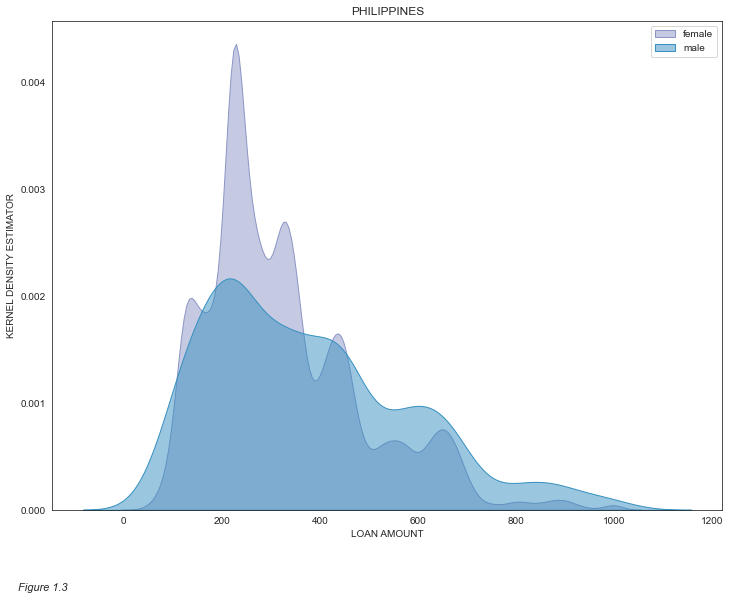

161.45514460701625 205.2421018482556


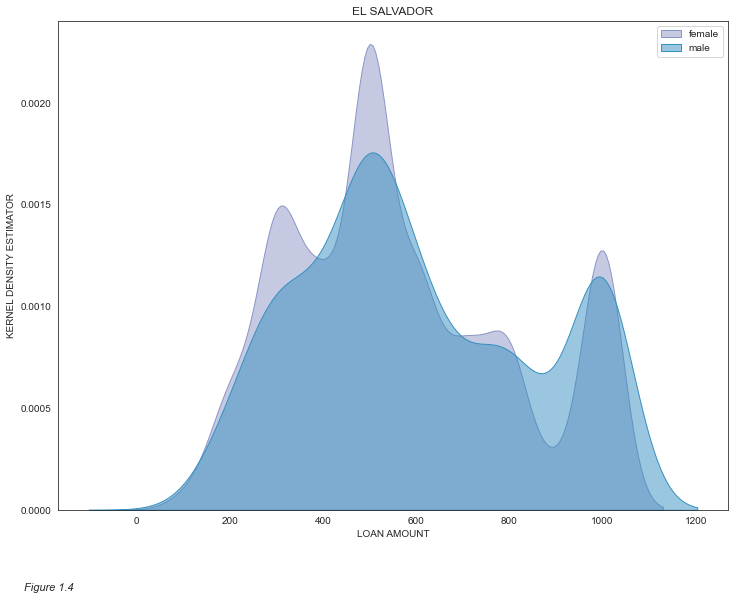

241.50361129627154 250.6427463552347


In [28]:
# hypothesis testing for Philippines and El Salvador, where the averages for genders are close, to see if
# there is any statistically significant difference.
# NULL HYPOTHESIS: no stastistically significant difference exists between the average loan amounts received
# by males and females in both, Philippines and El Salvador
# ALTERNATIVE HYPOTHESIS: a statistically significant difference exists

# two sample t-test:

philippines_females = df[(df.country == 'Philippines') & (df.gender == 'female')]['loan_amount']
philippines_males = df[(df.country == 'Philippines') & (df.gender == 'male')]['loan_amount']
elsalvador_females = df[(df.country == 'El Salvador') & (df.gender == 'female')]['loan_amount']
elsalvador_males = df[(df.country == 'El Salvador') & (df.gender == 'male')]['loan_amount']

# ASSUMPTIONS:
    # samples are approximately normally distributed (invalid)
    # stdsof samples are equal (invalid)
    # samples are independent (valid)
    
def kde_plot_philippines():
    f = plt.figure(figsize = (12, 9))
    text = 'Figure 1.3'
    plt.figtext(0.085, 0.0, text, wrap = True, fontsize = 11, fontstyle = 'oblique')

    sns.kdeplot(philippines_females, color = '#8c96c6', shade = True, alpha = 0.5)
    sns.kdeplot(philippines_males, color = '#3690c0', shade = True, alpha = 0.5)
    
    plt.title('PHILIPPINES')
    plt.xlabel('LOAN AMOUNT')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    plt.legend(['female', 'male'])
    
    plt.show()

kde_plot_philippines()

std_philippines_females = np.std(philippines_females)
std_philippines_males = np.std(philippines_males)
print(std_philippines_females, std_philippines_males)
# distributions not normal
# 161.45514460701625 205.2421018482556 --> not equal

def kde_plot_elsalvador():
    f = plt.figure(figsize = (12, 9))
    text = 'Figure 1.4'
    plt.figtext(0.085, 0.0, text, wrap = True, fontsize = 11, fontstyle = 'oblique')

    sns.kdeplot(elsalvador_females, color = '#8c96c6', shade = True, alpha = 0.5)
    sns.kdeplot(elsalvador_males, color = '#3690c0', shade = True, alpha = 0.5)
    
    plt.title('EL SALVADOR')
    plt.xlabel('LOAN AMOUNT')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    plt.legend(['female', 'male'])
    
    plt.show()

kde_plot_elsalvador()

std_elsalvador_females = np.std(elsalvador_females)
std_elsalvador_males = np.std(elsalvador_males)
print(std_elsalvador_females, std_elsalvador_males)
# distributions not normal
# 241.50361129627154 250.6427463552347 ---> can be considered equal



In [27]:
from scipy.stats import ttest_ind

pval_philippines = ttest_ind(philippines_females, philippines_males, equal_var = False)[1]
pval_elsalvador = ttest_ind(elsalvador_females, elsalvador_males)[1]

print(pval_philippines) # 6.660337734768853e-13 --> can reject the null hypothesis
print(pval_elsalvador) # 9.813995842610064e-05 --> can reject the null hypothesis

6.660337734768853e-13
9.813995842610064e-05


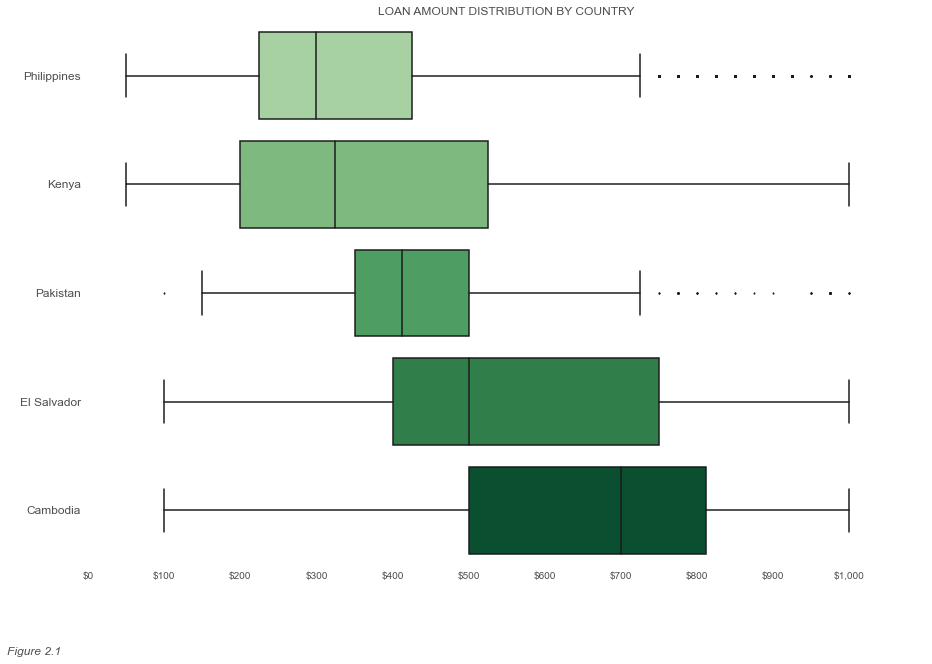

philippines mean: 300.0
kenya mean: 325.0
cambodia mean: 700.0
pakistan iqr: 150.0
kenya iqr: 325.0
el salvador iqr: 350.0
cambodia iqr: 312.5


In [43]:
import matplotlib.ticker as mtick

def loan_amount_by_country_boxplot():
    f, ax = plt.subplots(figsize = (15, 10))
    plt.xlim(0, 1100)

    sns.set_style('white')
    
    sns.boxplot(x = 'loan_amount', y = 'country', data = df, orient = 'h',\
                #palette = ['#d9f0a3', '#addd8e', '#78c679', '#41ab5d', '#238443'],\
                palette = ['#a1d99b', '#74c476', '#41ab5d', '#238b45', '#005a32'],\
                order = ['Philippines', 'Kenya', 'Pakistan', 'El Salvador', 'Cambodia'],\
                fliersize = 1.2)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('LOAN AMOUNT DISTRIBUTION BY COUNTRY', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.yticks(fontsize = 12, color = '#4f4e4e')
    plt.xticks([x * 100 for x in range(11)], color = '#4f4e4e')
    tick = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(tick)
    
    plt.figtext(0.05, 0.0, 'Figure 2.1', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_country_boxplot()

philippines_median = np.median(df[df.country == 'Philippines']['loan_amount'])
print('philippines mean:', philippines_median)

kenya_median = np.median(df[df.country == 'Kenya']['loan_amount'])
print('kenya mean:', kenya_median)

cambodia_median = np.median(df[df.country == 'Cambodia']['loan_amount'])
print('cambodia mean:', cambodia_median)

pakistan_3 = np.percentile(df[df.country == 'Pakistan']['loan_amount'], 75)
pakistan_1 = np.percentile(df[df.country == 'Pakistan']['loan_amount'], 25)
print('pakistan iqr:', pakistan_3 - pakistan_1)

kenya_3 = np.percentile(df[df.country == 'Kenya']['loan_amount'], 75)
kenya_1 = np.percentile(df[df.country == 'Kenya']['loan_amount'], 25)
print('kenya iqr:', kenya_3 - kenya_1)

elsalvador_3 = np.percentile(df[df.country == 'El Salvador']['loan_amount'], 75)
elsalvador_1 = np.percentile(df[df.country == 'El Salvador']['loan_amount'], 25)
print('el salvador iqr:', elsalvador_3 - elsalvador_1)

cambodia_3 = np.percentile(df[df.country == 'Cambodia']['loan_amount'], 75)
cambodia_1 = np.percentile(df[df.country == 'Cambodia']['loan_amount'], 25)
print('cambodia iqr:', cambodia_3 - cambodia_1)


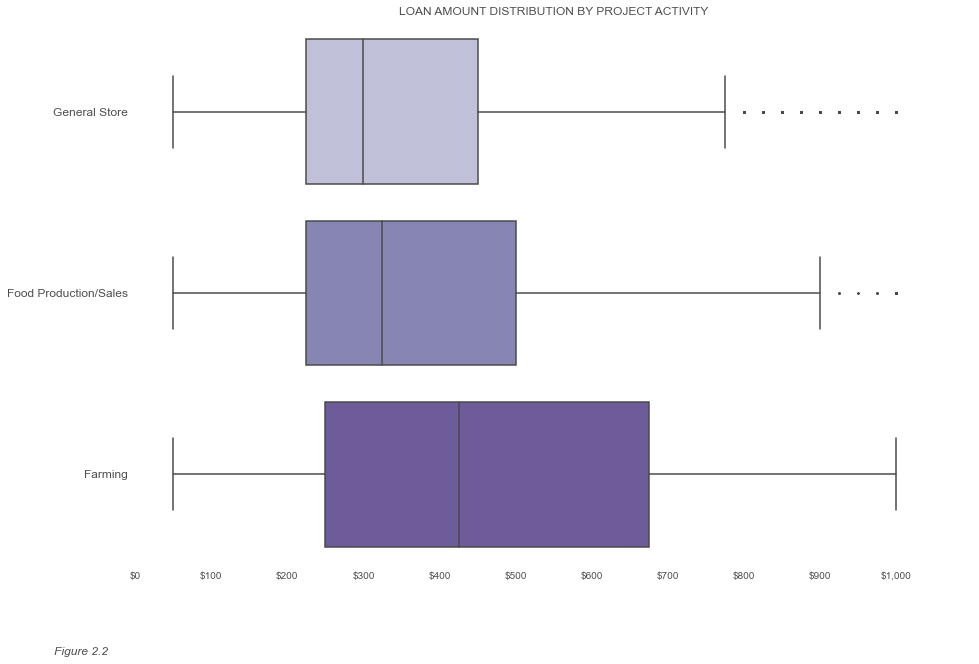

425.0
300.0
                activity  loan_amount
0                Farming         2744
1  Food Production/Sales        13239
2          General Store        49516


In [52]:
def loan_amount_by_activity_boxplot():
    f, ax = plt.subplots(figsize = (15, 10))
    plt.xlim(0, 1100)

    sns.set_style('white')
    
    sns.boxplot(x = 'loan_amount', y = 'activity', data = df, orient = 'h',\
                palette = ['#bcbddc', '#807dba', '#6a51a3'],\
                order = ['General Store', 'Food Production/Sales', 'Farming'],\
                fliersize = 1.2)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('LOAN AMOUNT DISTRIBUTION BY PROJECT ACTIVITY', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.yticks(fontsize = 12, color = '#4f4e4e')
    plt.xticks([x * 100 for x in range(11)], color = '#4f4e4e')
    tick = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(tick)
    
    plt.figtext(0.05, 0.0, 'Figure 2.2', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_activity_boxplot()

farming_median = np.median(df[df.activity == 'Farming']['loan_amount'])
print(farming_median)

general_store_median = np.median(df[df.activity == 'General Store']['loan_amount'])
print(general_store_median)

print(df.groupby(['activity']).loan_amount.count().reset_index())

- General store activity recieves lower amount loans than food production/ sales or farming. 
- Farming has the most spread distribution of loan amounts given, with a higher median value than the other two categories. This indicates that:
1. One is more likely to receive a higher loan amount for a farming-related project, the median is the highest;
2. There are no outliers for farming, hence the highest possible loan amount recieved was for farming activities;
3. The IQR spread is greater for farming, indicating that people recieve a wider range of loans for farming than for the other two activities.

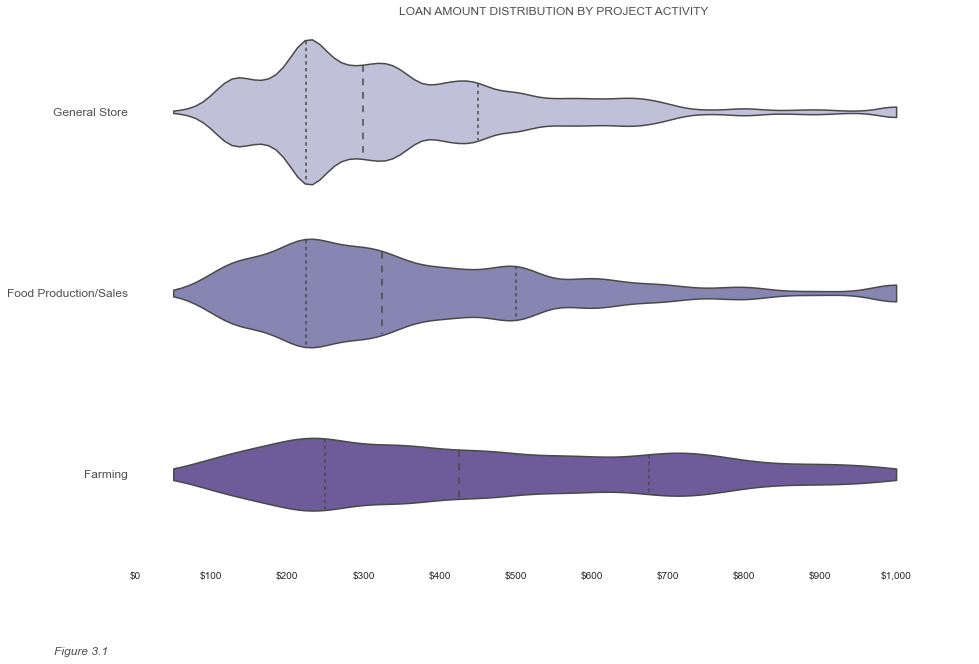

In [10]:
def loan_amount_by_activity_violinplot():
    f, ax = plt.subplots(figsize = (15, 10))
    plt.xlim(0, 1100)

    sns.set_style('white')
    
    sns.violinplot(x = 'loan_amount', y = 'activity', data = df, orient = 'h', cut = 0,\
                inner = 'quartiles', palette = ['#bcbddc', '#807dba', '#6a51a3'],\
                order = ['General Store', 'Food Production/Sales', 'Farming'],\
                fliersize = 1.2)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('LOAN AMOUNT DISTRIBUTION BY PROJECT ACTIVITY', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.yticks(fontsize = 12, color = '#4f4e4e')
    plt.xticks([x * 100 for x in range(11)])
    tick = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(tick)
    
    plt.figtext(0.05, 0.0, 'Figure 3.1', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_activity_violinplot()

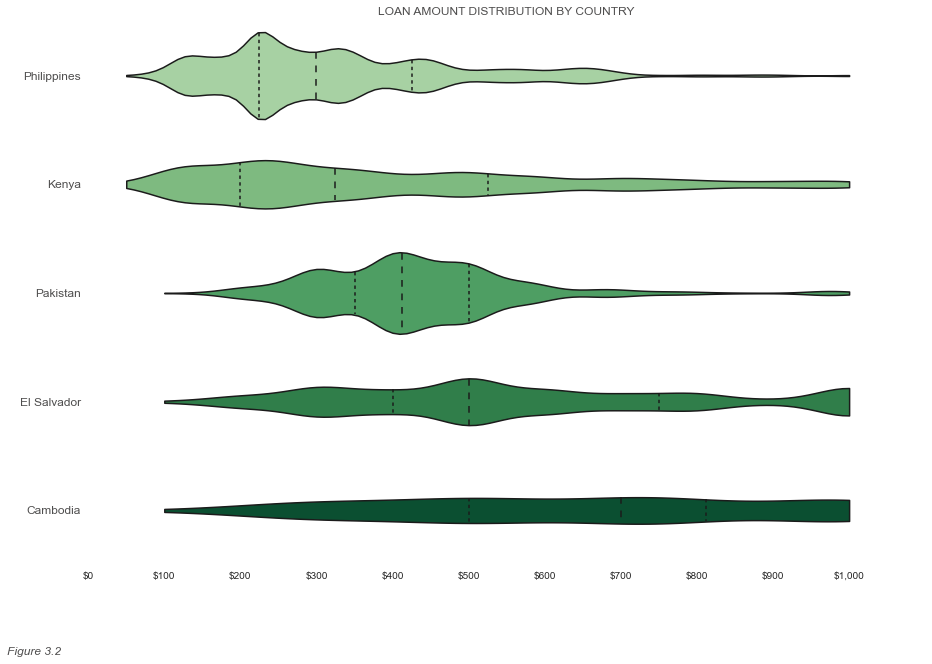

In [11]:
def loan_amount_by_country_violinplot():
    f, ax = plt.subplots(figsize = (15, 10))
    plt.xlim(0, 1100)

    sns.set_style('white')
    
    sns.violinplot(x = 'loan_amount', y = 'country', data = df, orient = 'h', cut = 0, inner = 'quartiles',\
                #palette = ['#d9f0a3', '#addd8e', '#78c679', '#41ab5d', '#238443'],\
                palette = ['#a1d99b', '#74c476', '#41ab5d', '#238b45', '#005a32'],\
                order = ['Philippines', 'Kenya', 'Pakistan', 'El Salvador', 'Cambodia'],\
                fliersize = 1.2)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('LOAN AMOUNT DISTRIBUTION BY COUNTRY', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.yticks(fontsize = 12, color = '#4f4e4e')
    plt.xticks([x * 100 for x in range(11)])
    tick = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(tick)
    
    plt.figtext(0.05, 0.0, 'Figure 3.2', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_country_violinplot()

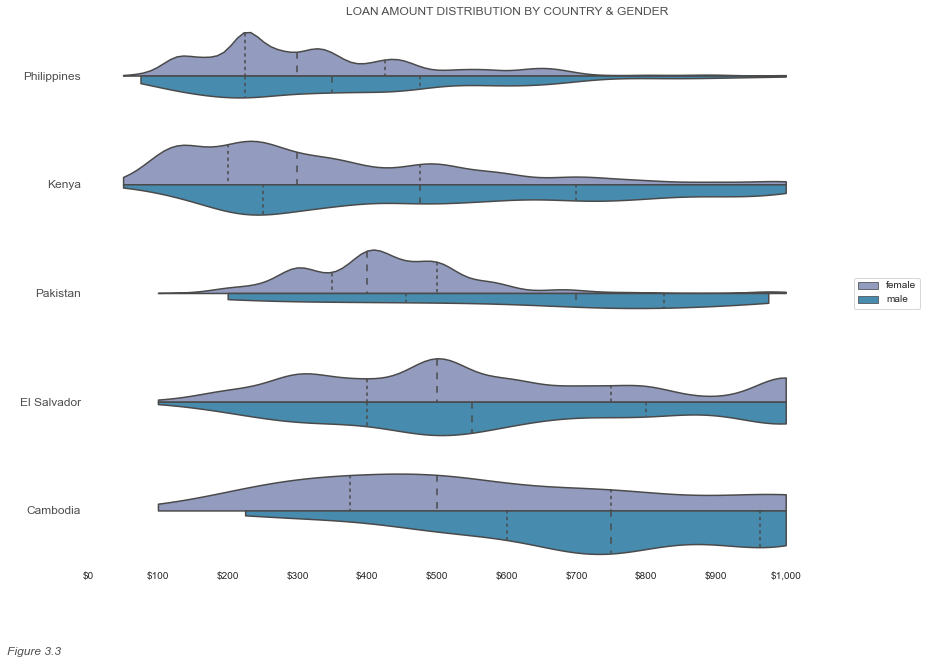

In [12]:
def loan_amount_by_country_hue_gender_violinplot():
    f, ax = plt.subplots(figsize = (15, 10))
    plt.xlim(0, 1200)

    sns.set_style('white')
    
    sns.violinplot(x = 'loan_amount', y = 'country', hue = 'gender', data = df, orient = 'h', cut = 0,\
                split = True, inner = 'quartiles', palette = ['#8c96c6', '#3690c0'],\
                order = ['Philippines', 'Kenya', 'Pakistan', 'El Salvador', 'Cambodia'],\
                fliersize = 1.2)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('LOAN AMOUNT DISTRIBUTION BY COUNTRY & GENDER', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(loc = 7)
    
    plt.yticks(fontsize = 12, color = '#4f4e4e')
    plt.xticks([x * 100 for x in range(11)])
    tick = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(tick)
    
    plt.figtext(0.05, 0.0, 'Figure 3.3', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

loan_amount_by_country_hue_gender_violinplot()

- Male distributions for each country appear more uniformly spread out.
- Males tend to receive higher loans than females.
- Quartiles tend to be shifted higher for male distributions for each country.
- Median loan value is higher for males for each country.

### DISCUSSION AND EVALUATION

- Figure 1.1 shows a bar plot of the average loan amount received in each country. Philippines has the lowest average loan amount received, of 328.09USD, while Cambodia has the highest, of 645.09USD.<br><br>

- Figure 1.2 shows the same bar plot, split by gender. Here, one can see that males tend to receive significantly higher loan amounts than females do, yet far more females apply for loans than males in each country:<br><br>

```python
       country  gender  count
0     Cambodia  female      93
1     Cambodia    male      75
2  El Salvador  female    5480
3  El Salvador    male     692
4        Kenya  female    4943
5        Kenya    male    2157
6     Pakistan  female    1732
7     Pakistan    male      54
8  Philippines  female   49384
9  Philippines    male     889
```
- For Philippines and El Salvador, the difference in average loan amounts isn’t as great as for the other countries, however, a two-sample t-test confirmed that for both, Philippines and El Salvador, this disparity is still statistically significant. It should be noted, however, that population of loan-receiving males and loan-receiving females in either country are not normally distributed, and for Philippines the standard deviations of male and female distributions are also vastly different. Hence, the all of required assumptions for two-sample t-test validity were not met.<br><br>

- Figure 2.1 shows a series of box plots of loan amounts by country:<br><br>
	- For Philippines and Pakistan, the loan amounts exceeding circa 720USD are upper bound outliers, meaning it is much less likely that applicants in those countries would receive a loan amount of greater than 720USD.<br><br>
    
	- Philippines has the lowest median loan value of 300.0USD, followed closely by Kenya, with a median of 325.0USD. The highest median loan amount is in Cambodia, equal to 700.0USD.<br><br>
    
	- The most narrow distribution of loan amounts is in Pakistan. with interquartile range equal to 150.0USD, while the widest distribution is in El Salvador, equal to 350.0USD. Of those countries where upper bound outliers do not exist (Kenya, El Salvador, Cambodia), the most narrow distribution belongs to El Salvador.<br><br>

- Looking again at the raw numbers of males and females in each country:<br>

```python
       country  gender  count
0     Cambodia  female      93
1     Cambodia    male      75
2  El Salvador  female    5480
3  El Salvador    male     692
4        Kenya  female    4943
5        Kenya    male    2157
6     Pakistan  female    1732
7     Pakistan    male      54
8  Philippines  female   49384
9  Philippines    male     889
```
- It is apparent that in Cambodia, the number of applicants in total is much less than in El Salvador or Kenya. With this in mind, and considering the information from Figure 1.2, where large disparity in loan amounts given to males and females are seen in both Kenya and Cambodia, but much less so in El Salvador, it can be said that one is much more likely to receive a high loan amount in El Salvador regardless of gender than in any other country. However, if one is male, one is more likely to receive the largest possible loan amount in Cambodia, where the median is highest.<br><br>

- Additional information about each distribution can be seen in the violin plot, Figure 3.2, and Figure 3.3 shows violin plots by country, split by gender, further highlighting the male-female disparity.<br><br>

- Figure 2.1 shows a series of box plots of loan amounts by project activity. Farming boasts the highest median of 425.0USD, while the lowest is for General Store, equal to 300.0USD. The number of applications for farming activities, however, is much lower than for the other two activities and represents only Kenya and Pakistan:<br>

```python
                activity  count
0                Farming   2744
1  Food Production/Sales  13239
2          General Store  49516
```
- Farming also has the widest IQR, with the third and fourth quarters being more spread over higher loan amount values.<br><br>

- Figure 3.1 shows additional information about each distribution by activity as a violin plot, showing that General Store activity has a particularly high KDE in the first and second quartiles, where the loan amount is lowest. This is explained by the fact that Philippines accounts for the vast majority (41,734) General Store applications, while also having the lowest average loan amount per country for this activity of 334.40USD.<br><br>

- Food Production/ Sales and General Store both receive the substantial loan amounts on average from Cambodia and El Salvador.

### CONCLUSIONS

- Males receive significantly greater loan amounts than females do in each country despite there being significantly more female loan applications.<br><br>

- One is much more likely to receive a high loan amount in El Salvador regardless of gender than in any other country. However, if one is male, one is more likely to receive the largest possible loan amount in Cambodia, where the median loan amount is highest.<br><br>

- Kenya and Pakistan are the only countries that apply for Farming loans from this dataset, and applicants can expect to receives generous loan amounts, with the average being 459.98USD and 427.31USD respectively.<br><br>

- For other activities, General Store is the least likely to receive a high loan amount, especially in Philippines, where the average loan amount for this activity is 334USD.<br><br>